In [8]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import pandas as pd
import numpy
import os
import cv2
import matplotlib.pyplot as plt
import random
import torch
from tqdm import tqdm

In [9]:
model = CLIPModel.from_pretrained("patrickjohncyh/fashion-clip").to("cuda")
processor = CLIPProcessor.from_pretrained("patrickjohncyh/fashion-clip")

/home/guimcc/anaconda3/envs/hugginface/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
PATH = "/media/guimcc/Elements/datathon"
IMAGES_PATH = f"{PATH}/archive/images/images/"
CSV_PATH = f"{PATH}/archive/"
HEIGHT = 224
WIDTH = 160

In [11]:
product_df = pd.read_csv(f"{CSV_PATH}product_data.csv")
test_df = pd.read_csv(f"{CSV_PATH}test_data.csv")

In [12]:
test_df = test_df.drop_duplicates(subset='cod_modelo_color')

In [13]:
def load_imagePath_2_rgb(img_path):
    img = cv2.imread(f"{IMAGES_PATH}/{img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def load_imagePath_2_PIL(img_path):
    return Image.open(f"{IMAGES_PATH}/{img_path}")

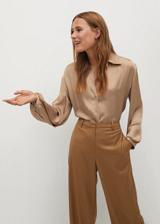

In [11]:
img_path = random.choice(product_df['des_filename'])
Image.open(f"{IMAGES_PATH}/{img_path}")

In [22]:
inputs = processor(texts=[], images=load_imagePath_2_PIL(img_path), return_tensors="pt", padding=True)

In [25]:
outputs = outputs = model.get_image_features(**inputs)

In [14]:
embeddings_file = "image_embeddings.pt"

embeddings = {}
with torch.no_grad():  # Disable gradient calculation for inference
    for img_name in tqdm(product_df['des_filename']):
        img_path = f"{IMAGES_PATH}/{img_name}"
        try:
            image = Image.open(img_path)
        except:
            print(f"Error opening image {img_path}")

        # Preprocess the image
        inputs = processor(images=image, return_tensors="pt", padding=True).to("cuda")
        
        # Get image embeddings
        image_features = model.get_image_features(**inputs)
        image_features = image_features.squeeze().cpu()  # Convert to a 1D tensor and move to CPU

        # Store embeddings in a dictionary
        embeddings[img_name] = image_features

torch.save(embeddings, embeddings_file)
print(f"Embeddings saved to {embeddings_file}")

  2%|▏         | 1505/61484 [00:11<07:23, 135.23it/s]


KeyboardInterrupt: 

In [5]:
embeddings_file = "image_embeddings.pt"
embeddings = torch.load(embeddings_file)




/tmp/ipykernel_179736/1776184731.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(embeddings_file)


dict_keys(['83_1124642_17074019-82_B.jpg', '86_1215223_47014392-01_B.jpg', '84_1167695_27005150-70_B.jpg', '82_1108473_87076320-01_B.jpg', '83_1137778_17014765-37_.jpg', '85_1188313_37013267-43_B.jpg', '82_1080107_87000522-56_B.jpg', '84_1162227_27085130-02_B.jpg', '84_1177833_27087759-01_B.jpg', '85_1190231_37094021-76_B.jpg', '84_1182566_27065805-43_B.jpg', '82_1120704_87047652-52_B.jpg', '84_1155693_27010064-36_B.jpg', '82_1100811_87095655-08_.jpg', '81_1070352_77035139-56_B.jpg', '85_1193230_37064049-02_B.jpg', '86_1225786_47027115-05_.jpg', '86_1205218_47010138-95_.jpg', '81_1072833_77097618-56_.jpg', '82_1092116_87053253-52_B.jpg', '81_1071856_77032912-02_B.jpg', '86_1226427_47101249-99_B.jpg', '85_1182660_37010467-88_.jpg', '82_1101591_87025669-37_B.jpg', '86_1216288_47041281-06_.jpg', '82_1110242_87005678-91_.jpg', '85_1188554_37054031-02_B.jpg', '84_1154298_27050089-99_B.jpg', '82_1113647_87067640-02_B.jpg', '84_1168479_27057727-41_.jpg', '85_1183777_37050459-TC_.jpg', '85_119

In [15]:
embeddings_file = "image_embeddings_test.pt"

embeddings_test = {}
with torch.no_grad():  # Disable gradient calculation for inference
    for img_name in tqdm(test_df['des_filename']):
        img_path = f"{IMAGES_PATH}/{img_name}"
        try:
            image = Image.open(img_path)
        except:
            print(f"Error opening image {img_path}")

        # Preprocess the image
        inputs = processor(images=image, return_tensors="pt", padding=True).to("cuda")
        
        # Get image embeddings
        image_features = model.get_image_features(**inputs)
        image_features = image_features.squeeze().cpu()  # Convert to a 1D tensor and move to CPU

        # Store embeddings in a dictionary
        embeddings_test[img_name] = image_features

torch.save(embeddings_test, embeddings_file)
print(f"Embeddings saved to {embeddings_file}")

 63%|██████▎   | 4136/6529 [00:29<00:16, 142.75it/s]

Error opening image /media/guimcc/Elements/datathon/archive/images/images//88_49720742_67044470-56_.jpg


100%|██████████| 6529/6529 [00:46<00:00, 141.50it/s]


Embeddings saved to image_embeddings_test.pt
